# Risk profiles of put option buyer and seller
Buying a put option gives you the right, but not the obligation to sell the underlying security at the given strike price, within a specific time period. Therefore a put option payoff at expiration depends on where the underlying price is relative to the put option strike price.

In this notebook, we will plot a put buyer's and a put seller's payoff graph for a 900 strike price put on the Infosys stock.

### Import Libraries 

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

#for making attractive and informative statistical graphs 
plt.style.use('seaborn-darkgrid')

## Put payoff
We define a function put_payoff that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and the premium of the put option as input.

It returns a numpy array containing the profit from put option for different stock prices. When the stock price is less than the strike price, the profit is measured as the difference between strike price and stock price, and when the stock price is greater than the strike price then the profit is zero. After this, a put premium is deducted from the pnl to compute the payoff.

In [26]:
#Payoff function 
def put_payoff(sT, strike_price, premium):
    pnl = np.where(sT<strike_price, strike_price - sT, 0)
    return pnl -premium 

## Define parameters

We will define the spot, price, the strike price, premium, and a range of possible values for the infosys stock price at expiration. 

In [27]:
# Infosys stock price
spot_price = 900

# Put stike price and cost 
strike_price = 900
premium = 20 

#Stock price range at the expiration of the put
# we have defined range for the stock price at expiry as +/- 10% from spot price
# Syntax: numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price, 1.1*spot_price)

## Put Option Buyer Payoff 

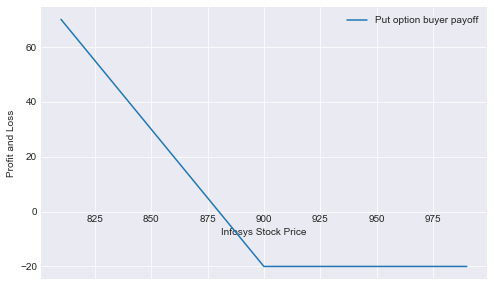

In [28]:
payoff_long_put = put_payoff(sT, strike_price, premium)

#Plot the graph 
fig, ax = plt.subplots(figsize = (8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, label= 'Put option buyer payoff')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

So what do you observe?

1. Even if the price of Infosys goes above the strike price of 900, the max loss seems to be just INR 20/-. Therefore, the loss to the put option buyer is restricted to the extent of the premium he has paid. 
2. The profit from this put option seem to increase linearly as and when Infosys start to move below the strike price of 900. Therefore, the lower the spot price goes the higher will be the profit. 
3. Through the put option is supposed to make a profit when the spot price moves below the strike price, the put option buyer first needs to recover the premium he has paid. 

For the above points, we can say that the buyer of the put option has limited risk and potential to make huge profit. 

## Put Option Seller Profit 
To get the payoff graph for option seller, we have multiplied the payoff to option buyer by -1.0, as the option buyer makes the profit, the option seller will lose the exact same amount and vice versa. 

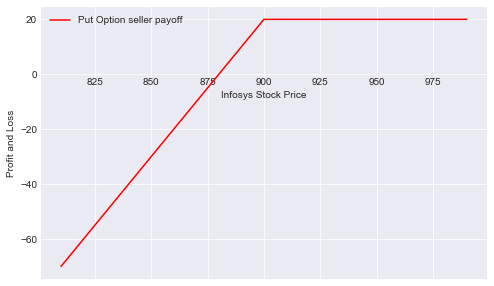

In [29]:
payoff_short_put = payoff_long_put * -1.0
#plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_put, label= 'Put Option seller payoff', color= 'r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

The put options seller payoff looks like a mirror image of the put option buyer payoff. 

1. The profit is resticted to INR 20/- as long as the spot price is trading at any price above the strike price of 900. 
2. From 900 to 880, we can see the profits getting reduced. 
3. Below 880, the put option seller starts losing money. The losses increase with a decrease in stock price. 

Therefore, you sell a put option only when your view is that the underlying asset will not fall beyond the strike price. 

In [30]:
#Calculate the put payoff without premium using np.where and store it in the payoff_put array.
# Put Payoff 
payoff_put = np.where(sT < strike_price, strike_price - sT, 0) 

## Call payoff
We define a function call_payoff that caculates the payoff from buying a call option. The function takes sT,  a range of possible values of the stock price at expiration, the strike price of the call option and the premium of the call option as input. It returns a numpy array containing the profit from the call option for different in stock price. When the stock price is less than the strike price the profit is zero. After this a call premium is deducted from the pnl. 

In [31]:
# Function for Call payoff
def call_payoff(sT, strike_price, premium): 
    pnl = np.where(sT> strike_price, sT - strike_price, 0)
    return pnl- premium

### Define Parameters
We will define the spot price, the strike price, premium, and a range of possible values for the Infosys stock at expiry.

In [32]:
# Infosys stock price 
spot_price = 900 

# Call strike price and cost
strike_price = 900 
premium = 20

# Stock price range at the expiration of the call
# We have defined range for the stock price at expiry as +/- 10% from spot price
# Syntax: numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price,1.1*spot_price) 

## Call Option Buyer Payoff

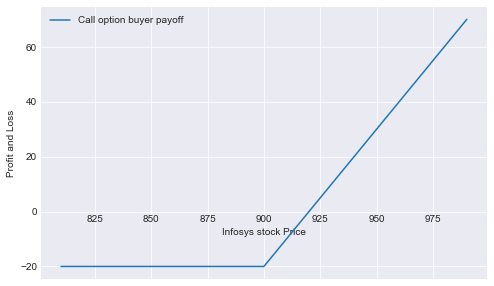

In [33]:
payoff_long_call = call_payoff(sT, strike_price, premium)
# Plot the graph
fig, ax = plt.subplots(figsize= (8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_call, label= 'Call option buyer payoff')
plt.xlabel('Infosys stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

So what do you observe?

1. Even if the price of Infosys goes below the strike price of 900, the maximum loss seems to be just INR 20/-. Therefore, the loss to the call option buyer is restricted to the extent of the premium he has paid.

2. The profit from this call option seems to increase linearly as and when Infosys starts to move above the strike price of 900. Therefore, the higher the spot price goes from the strike price, the higher is the profit.

3. Though the call option is supposed to make a profit when the spot price moves above the strike price, the call option buyer first needs to recover the premium he has paid.

From the above points, we can say that the buyer of the call option has limited risk and the potential to make an unlimited profit.

## Call Option Seller Payoff
Option buyer and Option seller are the two sides of the same coin. Therefore, to get the payoff grpah for the option seller, we have multipled the payoff of the option buyer by -1.0 as when the option buyer makes the profit, the option seller will lose the exact same amount and vice-versa. 

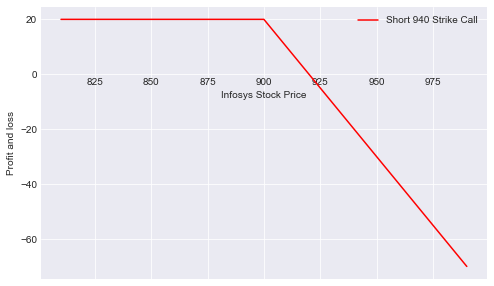

In [34]:
payoff_short_call = payoff_long_call * -1.0
#Plot 
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, label = 'Short 940 Strike Call', color= 'r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The call option seller payoff looks like a mirror image of the call option buyer payoff.

1. The profit is restricted to INR 20/- as long as the spot price is trading at any price below the strike of 900.
2. From 900 to 920, we can see the profits getting reduced.
3. Above 920, the call option seller starts losing money. The losses increase with an increase in stock price.

Therefore, you sell a call option only when your view is that the underlying asset will not increase beyond the strike price.

## Computing Historical Volatility 
Below we will be computing the 20 trading days (or 1 month) historical volatility for the time period starting from 20th April, 2016 to 13th April, 2018. 
Historical Volatility guages the flucatuation of underlying securities by measuring the price changes over a predetermined period of time in the past. 

In [35]:
data['20 day historical Volatilty'] = 100*data['Log Returns'].rolling(window=20).std()

### Stock Data
We will fethc the Apple Data using the pandas read_csv function. We will then, print the data to visualize it by using the head() function which prints the top 5 rows of dataset. 

In [36]:
#Import pandas to read csv function
import pandas as pd 

In [37]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,9/29/14,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,10/6/14,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,10/13/14,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,10/20/14,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,10/27/14,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


## Computing Log Returns

Now we will compute the daily log returns by using the `shift()` function for adjusted closing prices of the security. We make use of the numpy library for computing log of today's closing price divided by yesterday's closing price. The log returns are stored in the DataFrame data under the column header 'Log Returns'.

In [38]:
data['Log Returns'] = np.log(data['Adj_Close']/data['Adj_Close'].shift(1))

## Computing Historical Volatility

The one month (or 20 trading days) historical volatility will be computed by using the `DataFrame.rolling(window).std()` function which computes the rolling standard deviation of data['Log Returns'] for a period of 20 trading days. The standard deviation is multiplied by 100 to compute the percentage value for volatility. The historical volatility will be stored in the DataFrame under the column header '20 day Historical Volatility'.

In [39]:
data['20 day Historical Volatility'] = 100*data['Log Returns'].rolling(window=20).std()

## Plot the volatility
We will now plot the historical volatilty to visualise how it changes over the period of one year.

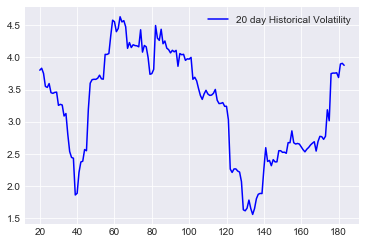

In [40]:
plt.plot(data['20 day Historical Volatility'], color = 'b', label ='20 day Historical Volatility')
plt.legend(loc='best')
plt.show()

In [41]:
#Print the last 5 rows of data using the tail function
print(data.tail())

        Date        Open        High         Low       Close   Adj_Close  \
179   3/5/18  175.210007  180.000000  174.270004  179.979996  179.979996   
180  3/12/18  180.289993  183.500000  177.619995  178.020004  178.020004   
181  3/19/18  177.320007  177.470001  164.940002  164.940002  164.940002   
182  3/26/18  168.070007  175.149994  165.190002  167.779999  167.779999   
183  3/29/18  167.804993  171.750000  166.899994  167.779999  167.779999   

        Volume  Log Returns  20 day Historical Volatility  
179  139852700     0.021169                      3.761592  
180  155417500    -0.010950                      3.688111  
181  172670700    -0.076314                      3.898762  
182  157898400     0.017072                      3.908949  
183   38398505     0.000000                      3.877588  


## Bull call spread
A bull call spread strategy is built by going long on call option and simultaneously selling a higher strike call option. The aim of this strategy is to benefit from small positive movements in the stock. In this section, we will build the payoff graph for long 920 strike call and short 940 strike call on Infosys.

## Call payoff
We define a function that calculates the payoff from buying a call option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the call option and premium of the call option as input. It returns the call option payoff.

In [42]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

### Define Parameters

In [43]:
# Infosys stock price 
spot_price = 900 

# Long call
strike_price_long_call = 920 
premium_long_call = 15

# Short call
strike_price_short_call = 940 
premium_short_call = 10

# Stock price range at expiration of the call
sT = np.arange(0.95*spot_price,1.1*spot_price,1) 

### Long 920 strike call payoff

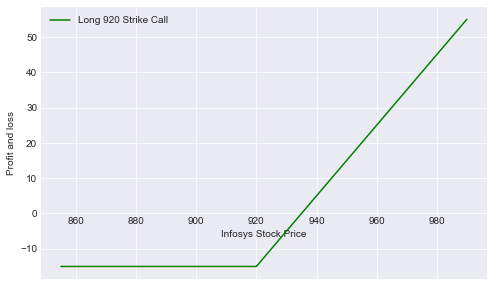

In [44]:
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
#plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long 920 Strike Call',color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

### Short 940 strike call payoff

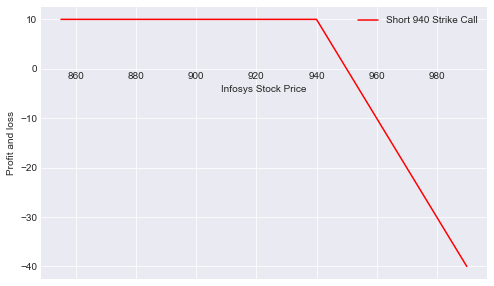

In [45]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 940 Strike Call',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Bull Call Spread Payoff 

Max Profit: 15.0
Min Profit: -5.0


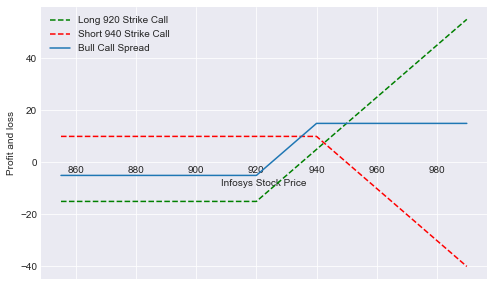

In [47]:
payoff_bull_call_spread = payoff_long_call + payoff_short_call

print("Max Profit:", max(payoff_bull_call_spread))
print("Min Profit:", min(payoff_bull_call_spread))

#Plot 
fig, ax = plt.subplots(figsize = (8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_call, '--', label='Long 920 Strike Call', color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 940 Strike Call ',color='r')
ax.plot(sT,payoff_bull_call_spread,label='Bull Call Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The max profit is capped at INR 15 and the max loss is limited to INR 5. Therefore, this strategy is suitable when your outlook is moderately bullish on the stock. 

## Bear put spread
A bear put spread strategy is built by going long on put option and simultaneously selling a lower strike put option. The aim of this strategy is to benefit from small negative movements in the stock. In this notebook, we will build the payoff graph for long 880 strike put and short 860 strike put on Infosys.

## Put payoff
We define a function that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and premium of the put option as input. It returns the put option payoff.

In [48]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) -premium 

### Define Parameters 

In [49]:
# Infosys stock price 
spot_price = 900 

# Long put
strike_price_long_put = 880 
premium_long_put = 15

# Short put
strike_price_short_put = 860 
premium_short_put = 10

# Stock price range at expiration of the put
sT = np.arange(0.9*spot_price,1.05*spot_price,1) 

### Long 880 strike Put Payoff

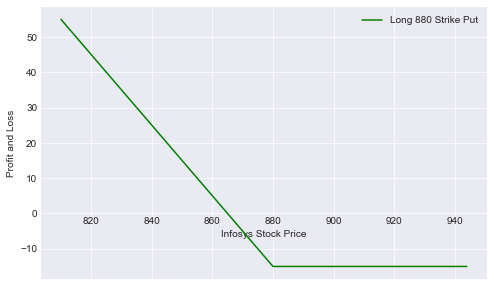

In [51]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
#plot
fig, ax = plt.subplots(figsize = (8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, label='Long 880 Strike Put', color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

### Short 860 strike put payoff

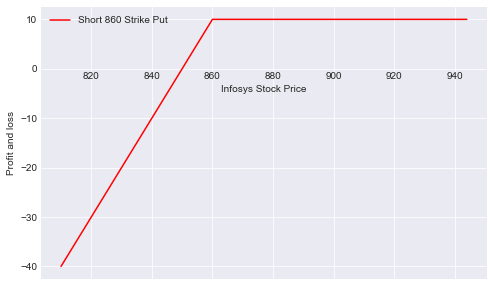

In [52]:
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0
#plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short 860 Strike Put',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Bear put spread payoff

Max Profit: 15.0
Max Loss: -5.0


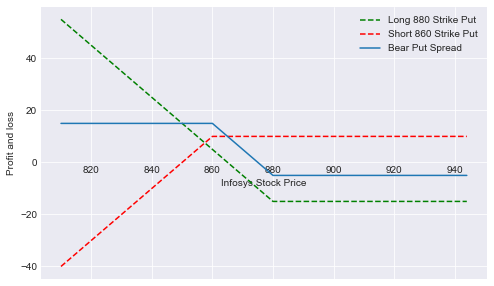

In [53]:
payoff_bear_put_spread = payoff_long_put + payoff_short_put

print ("Max Profit:", max(payoff_bear_put_spread))
print ("Max Loss:", min(payoff_bear_put_spread))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,'--',label='Long 880 Strike Put',color='g')
ax.plot(sT,payoff_short_put,'--',label='Short 860 Strike Put',color='r')
ax.plot(sT,payoff_bear_put_spread,label='Bear Put Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The max profit is capped at INR 15 and the max loss is limited to INR 5. Therefore, this strategy is suitable when your outlook is moderately bearish on the stock.

## Put payoff
We define a function that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and premium of the put option as input. It returns the put option payoff.

In [54]:
def put_payoff(sT, strike_price, premium): 
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

### Define parameters 

In [55]:
# Auro Pharma stock price 
spot_price = 700 

# Auro Pharma stock purchase price
stock_purchase_price = 700 

# Short put
strike_price_long_put = 700
premium_long_put = 20

# Stock price range at expiration of the put
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

### Long 700 Strike Put Payoff 

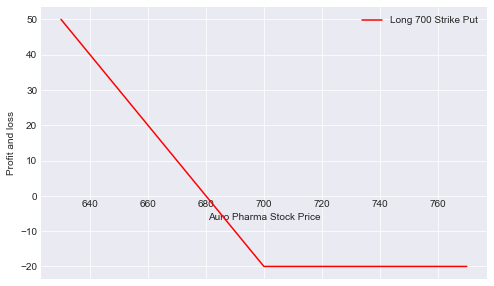

In [56]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
#Plot 
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long 700 Strike Put',color='r')
plt.xlabel('Auro Pharma Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

### Long Auro pharma stock payoff

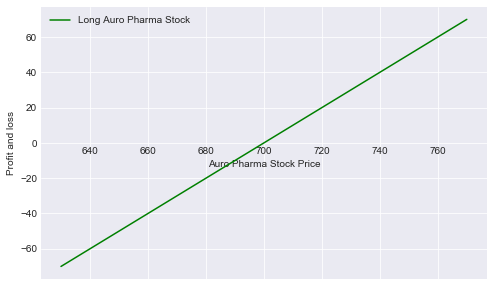

In [58]:
payoff_auro_pharma_stock = sT - stock_purchase_price
#Plot 
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_auro_pharma_stock,label='Long Auro Pharma Stock',color='g')
plt.xlabel('Auro Pharma Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Protective put payoff

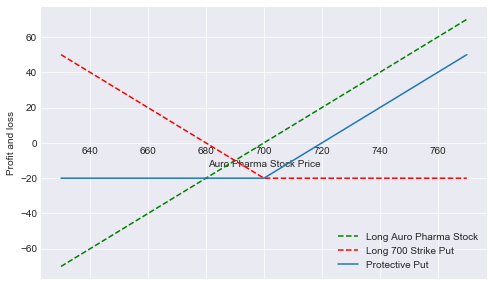

In [59]:
payoff_protective_put = payoff_auro_pharma_stock + payoff_long_put
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_auro_pharma_stock,'--',label='Long Auro Pharma Stock',color='g')
ax.plot(sT,payoff_long_put,'--',label='Long 700 Strike Put',color='r')
ax.plot(sT,payoff_protective_put,label='Protective Put')
plt.xlabel('Auro Pharma Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The max profit is unlimited and the max loss is limited to INR 20.

## Covered call strategy
A covered call strategy is built by going long on a stock and simultaneously selling a call option on that stock. The strategy is used when the view on the stock is neutral. In this notebook, we will build a payoff graph for the Wipro stock bought for Rs. 300 and short 300 strike call.

## Call payoff
We define a function that calculates the payoff from buying a call option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the call and premium of the call option as input. It returns the call option payoff.

In [60]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

### Define parameters

In [61]:
# Wipro stock price 
spot_price = 300 

# Short call
strike_price_short_call = 300
premium_short_call = 10

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

## Wipro stock payoff

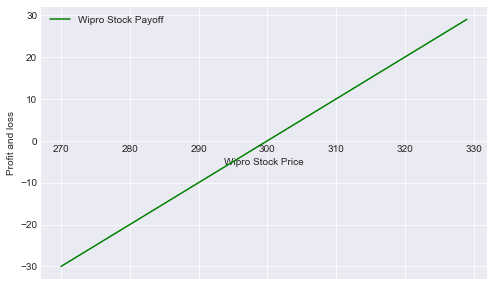

In [62]:
payoff_wipro_stock = sT-300
#plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_wipro_stock, label='Wipro Stock Payoff', color='g')
plt.xlabel('Wipro Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Short 300 strike call payoff

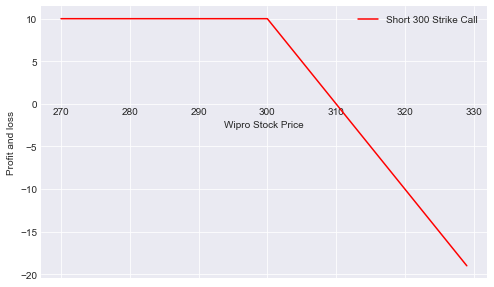

In [63]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 300 Strike Call',color='r')
plt.xlabel('Wipro Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Covered call payoff

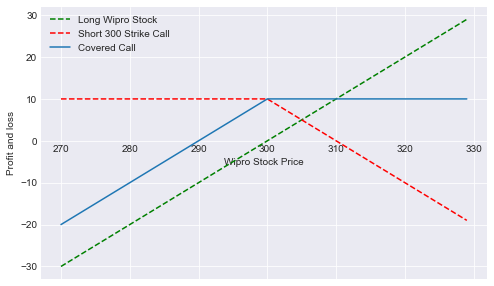

In [64]:
covered_call_payoff = payoff_wipro_stock + payoff_short_call
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_wipro_stock,'--',label='Long Wipro Stock',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 300 Strike Call ',color='r')
ax.plot(sT,covered_call_payoff,label='Covered Call')
plt.xlabel('Wipro Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The max profit is capped at INR 10 if the Wipro stock moves to any price above INR 300 and the max loss is proportional to price fall below INR 300.

